# 1-直线图

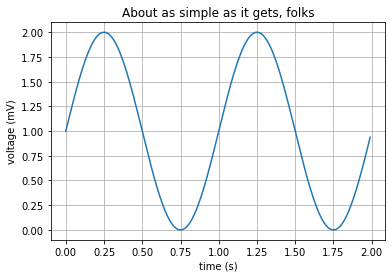

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

# fig.savefig("test.png")
plt.show()

# 2 多个子图

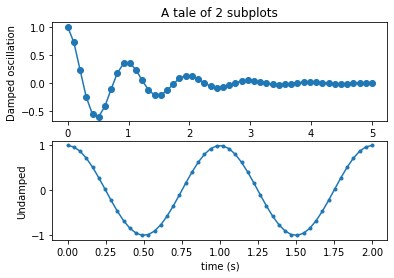

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

fig, (ax1,ax2) = plt.subplots(2,1)

ax1.plot(x1,y1,'o-')
ax1.set(ylabel='Damped oscillation',title='A tale of 2 subplots')

ax2.plot(x2,y2,'.-')
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Undamped')
# ax2.set_title('A tale of 2 subplots')
# ax2.set(xlabel='time (s)',ylabel='Undamped',title='A tale of 2 subplots')
plt.show()

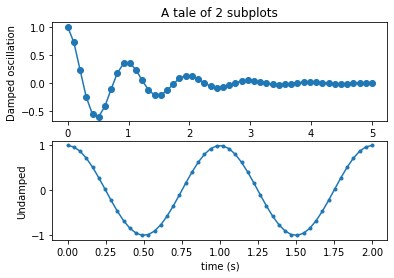

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

# 3 Histograms

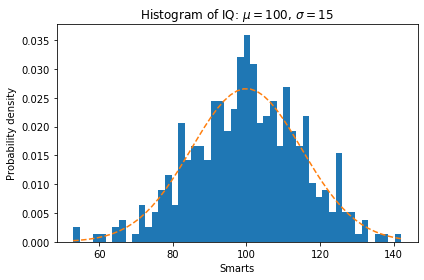

In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# 4 path

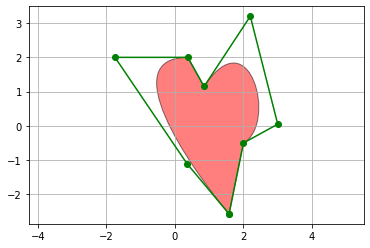

In [5]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')

ax.grid()
ax.axis('equal')
plt.show()

# 5 bar

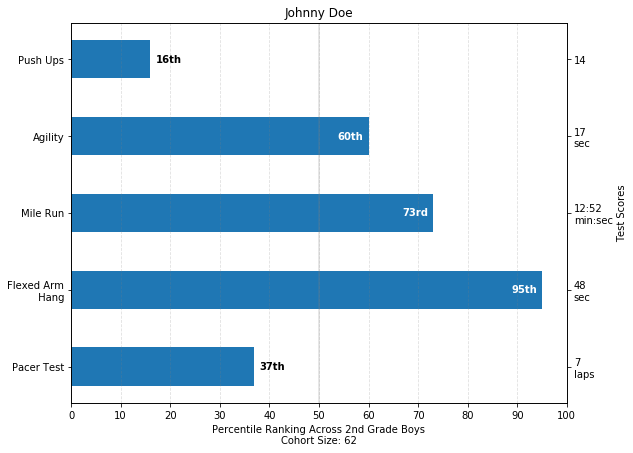

In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

np.random.seed(42)

Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

# GLOBAL CONSTANTS
test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility',
              'Push Ups']
test_meta = dict(zip(test_names, ['laps', 'sec', 'min:sec', 'sec', '']))


def attach_ordinal(num):
    """Convert an integer to an ordinal string, e.g. 2 -> '2nd'."""
    suffixes = {str(i): v
                for i, v in enumerate(['th', 'st', 'nd', 'rd', 'th',
                                       'th', 'th', 'th', 'th', 'th'])}

    v = str(num)
    # special case early teens
    if v in {'11', '12', '13'}:
        return v + 'th'
    return v + suffixes[v[-1]]


def format_score(scr, test):
    """
    Build up the score labels for the right Y-axis by first
    appending a carriage return to each string and then tacking on
    the appropriate meta information (i.e., 'laps' vs. 'seconds'). We
    want the labels centered on the ticks, so if there is no meta
    info (like for pushups) then don't add the carriage return to
    the string
    """
    md = test_meta[test]
    if md:
        return '{0}\n{1}'.format(scr, md)
    else:
        return scr


def format_ycursor(y):
    y = int(y)
    if y < 0 or y >= len(test_names):
        return ''
    else:
        return test_names[y]


def plot_student_results(student, scores, cohort_size):
    #  create the figure
    fig, ax1 = plt.subplots(figsize=(9, 7))
    fig.subplots_adjust(left=0.115, right=0.88)
    fig.canvas.set_window_title('Eldorado K-8 Fitness Chart')

    pos = np.arange(len(test_names))

    rects = ax1.barh(pos, [scores[k].percentile for k in test_names],
                     align='center',
                     height=0.5,
                     tick_label=test_names)

    ax1.set_title(student.name)

    ax1.set_xlim([0, 100])
    ax1.xaxis.set_major_locator(MaxNLocator(11))
    ax1.xaxis.grid(True, linestyle='--', which='major',
                   color='grey', alpha=.25)

    # Plot a solid vertical gridline to highlight the median position
    ax1.axvline(50, color='grey', alpha=0.25)

    # Set the right-hand Y-axis ticks and labels
    ax2 = ax1.twinx()

    scoreLabels = [format_score(scores[k].score, k) for k in test_names]

    # set the tick locations
    ax2.set_yticks(pos)
    # make sure that the limits are set equally on both yaxis so the
    # ticks line up
    ax2.set_ylim(ax1.get_ylim())

    # set the tick labels
    ax2.set_yticklabels(scoreLabels)

    ax2.set_ylabel('Test Scores')

    xlabel = ('Percentile Ranking Across {grade} Grade {gender}s\n'
              'Cohort Size: {cohort_size}')
    ax1.set_xlabel(xlabel.format(grade=attach_ordinal(student.grade),
                                 gender=student.gender.title(),
                                 cohort_size=cohort_size))

    rect_labels = []
    # Lastly, write in the ranking inside each bar to aid in interpretation
    for rect in rects:
        # Rectangle widths are already integer-valued but are floating
        # type, so it helps to remove the trailing decimal point and 0 by
        # converting width to int type
        width = int(rect.get_width())

        rankStr = attach_ordinal(width)
        # The bars aren't wide enough to print the ranking inside
        if width < 40:
            # Shift the text to the right side of the right edge
            xloc = 5
            # Black against white background
            clr = 'black'
            align = 'left'
        else:
            # Shift the text to the left side of the right edge
            xloc = -5
            # White on magenta
            clr = 'white'
            align = 'right'

        # Center the text vertically in the bar
        yloc = rect.get_y() + rect.get_height() / 2
        label = ax1.annotate(rankStr, xy=(width, yloc), xytext=(xloc, 0),
                            textcoords="offset points",
                            ha=align, va='center',
                            color=clr, weight='bold', clip_on=True)
        rect_labels.append(label)

    # make the interactive mouse over give the bar title
    ax2.fmt_ydata = format_ycursor
    # return all of the artists created
    return {'fig': fig,
            'ax': ax1,
            'ax_right': ax2,
            'bars': rects,
            'perc_labels': rect_labels}


student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(
    test_names,
    (Score(v, p) for v, p in
     zip(['7', '48', '12:52', '17', '14'],
         np.round(np.random.uniform(0, 100, len(test_names)), 0)))))
cohort_size = 62  # The number of other 2nd grade boys

arts = plot_student_results(student, scores, cohort_size)
plt.show()

# 饼状图

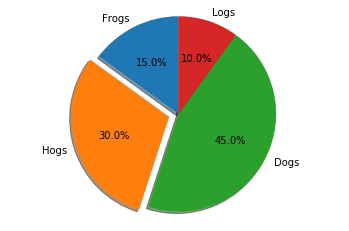

In [8]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 表格

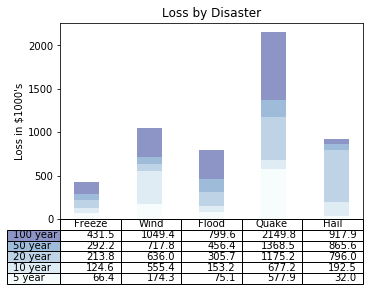

In [9]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

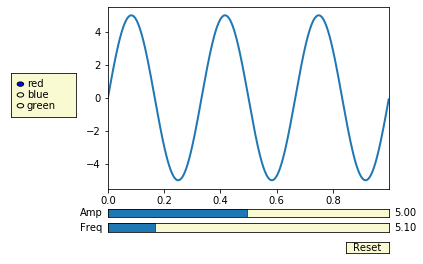

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

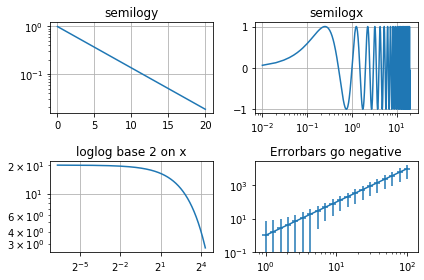

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0), basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonposx='clip')
ax4.set_yscale("log", nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()
plt.show()

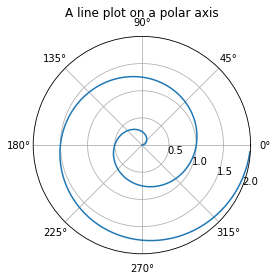

In [13]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

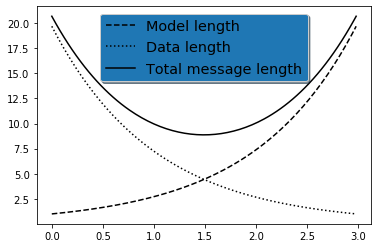

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data.
a = b = np.arange(0, 3, .02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(a, c, 'k--', label='Model length')
ax.plot(a, d, 'k:', label='Data length')
ax.plot(a, c + d, 'k', label='Total message length')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()

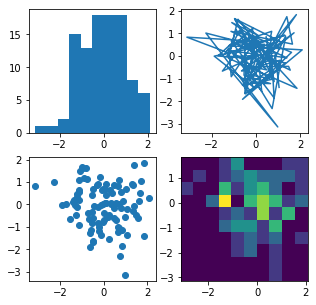

In [15]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

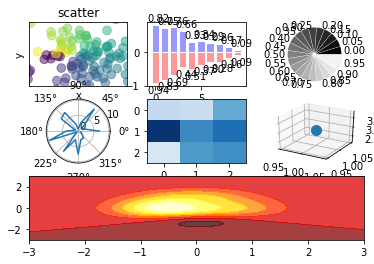

In [19]:

#scatter
fig =plt.figure()
ax=fig.add_subplot(3,3,1)
n=128
X=np.random.normal(0,1,n)
Y=np.random.normal(0,1,n)
T=np.arctan2(Y,X)
#plt.axes([0.025,0.025,0.95,0.95])
#plt.scatter(X,Y,s=75,c=T,alpha=0.5)
ax.scatter(X,Y,s=75,c=T,alpha=0.5)
plt.xlim(-1.5,1.5)
plt.xticks([])
plt.ylim(-1.5,1.5)
plt.yticks([])
plt.axis()
plt.title("scatter")
plt.xlabel("x")
plt.ylabel("y")

#bar
fig.add_subplot(332)
n=10
X=np.arange(n)
Y1=(1-X/float(n))*np.random.uniform(0.5,1.0,n)
Y2=(1-X/float(n))*np.random.uniform(0.5,1.0,n)
plt.bar(X,+Y1,facecolor='#9999ff',edgecolor='white')
plt.bar(X,-Y2,facecolor='#ff9999',edgecolor='white')
for x,y in zip(X,Y1):
    plt.text(x+0.4,y+0.05,'%0.2f' % y,ha="center",va="bottom")
for x,y in zip(X,Y2):
    plt.text(x+0.4,-y-0.05,'%0.2f' % y,ha="center",va="top")

#pie
fig.add_subplot(3,3,3)
n=20
Z=np.ones(n)
Z[-1]*=2
plt.pie(Z,explode=Z*.05,colors=['%f' % (i/float(n)) for i in range(n)],
        labels=['%.2f' %(i/float(n)) for i in range(n)])
plt.gca().set_aspect('equal')
plt.xticks([])
plt.yticks([])

#polar
fig.add_subplot(334,polar=True)
n=20
theta=np.arange(0.0,2*np.pi,2*np.pi/n)
radii=10*np.random.rand(n)
#plt.plot(theta,radii) #此方法也可以画出极坐标图形
plt.polar(theta,radii)

#heatmap
fig.add_subplot(335)
from matplotlib import cm
data=np.random.rand(3,3)
cmap=cm.Blues
map=plt.imshow(data,interpolation='nearest',cmap=cmap,aspect='auto',vmin=0,vmax=1)

#3D
from mpl_toolkits.mplot3d import Axes3D
ax=fig.add_subplot(336,projection="3d")
ax.scatter(1,1,3,s=100) 

#hot map
fig.add_subplot(313)
def f(x,y) :
    return (1-x/2+x**2+y**3)*np.exp(-x**2-y**2)
n=256
x=np.linspace(-3,3,n)
y=np.linspace(-3,3,n)
X,Y=np.meshgrid(x,y)
plt.contourf(X,Y,f(X,Y),8,alpha=.75,cmap=plt.cm.hot)
# plt.savefig("./fig.png")

plt.show()